# Osa 4 - Syväoppiminen harjoitustyö (15 p)


## Tehtävä 4-1
### Aihe: Syväoppimisen toteutussuunnitelma + aineiston valinta (3 p)

1. Valitse aineistosi tehtävään vapaasti esimerkiksi oman kiinnostuksen tai työn pohjalta. 
   1. Tutustu aineistoon kunnolla
2. Esikäsittele data 
   1. Optimoi koneoppimismallille syötettävää dataa
   2. voit poistaa "tarpeettomat piirteet" oman harkinnan mukaan
   3. poikkeavien tai tyhjien data-arvojen käsittely
3. Normalisoi data 
   1. Valitse sopiva skaalaustapa
4. Valitse luokkamuuttuja 
5. Visualisoi dataa muutamilla eri kuvioilla. 


In [ ]:
KÄY LOPUKIS ANALYYSIÄ VARTEN ja muutenkin kaikki aikaisemmat harjoitukset!!!! sekä telegram!!!

### Valittu aineisto
Tämä harjoitustyö oli hyödyllinen, että tuli kerrattua ja virkistettyä muistia monenkin kurssiosan ja tehtvien ratkaisuja
Minulle tämä oli kun oli tavaölaan henk. kohtaista dataa eli pyöräilyaktiviteetteja

Ylimääräistä päänvaivaa lisäsi data-aineiston puutteet tiettyjen suureiden osalta, myös oman luokituksen tekeminen 
myös haastavaa, mutta antoisaa ;)
Oli lopulta opettvainen prosessi vaikkain varisnain syvöoppiminen oli lähennä meLearning
deepkearnig -> meLearinng syväluotaus ja analytiikkaa omiin suorituksiin liittyen


#############
LISÄÄÄ fullstack selvityksetä jotakin

Aineistoksi valitsin oman pyöräilyaktiviteetit viimeisen 10 vuoden ajalta. \
Data on tallenettu Strava-palveluun \
https://www.strava.com  \
Data saadaan tilattua zip-pakettina sähköpostiin

Loppuun
Strava-palvelun maksullisella versiolla saadaa huomattavasti enemmän dataa mahd. myös sää tietoja ko. suorituksen aikna lämpötiöa tuuli yms.
https://www.strava.com/clubs/231407/posts/9470686
Itselläni ei ollut ko.     
Voitaisiin toki hakea jostakin palvelusta ja lisätä jotakin tietoja mutta miten sitä soveltaa onkin toinen juttu
mutta sää olosuhteilla on hyvinkin suuri vaikutus koska mm. vuodenajat ovat erilaiset 
Voitaissin ottaa huomioon sääolosuhteiden vaikutus
https://www.worldweatheronline.com/weather-api/
https://openweathermap.org/api

Mutta viisanta jos haluaa hyödyntää säädataa on hamkkia Stravan maksullinen verio, jolloin ko datan saa suoraan omiin sarakkeihinsa ja on tallessa yhdessä paikassa.

Wind and Temperature mahd. rain snow water ice/snow/ minu s degrees
#############


Huomiotavaa olisi 
1. Weather Condition
2. Day of the Week and Weekend


https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec
https://www.geeksforgeeks.org/difference-between-classification-and-prediction-methods-in-data-mining/

Oman luokituksen eri luokkien lukumäärä siis value_counts
tulostaa hintaluokka-sarakkeen hintaluokkien lukumäärät value_counts()-metodilla,
Tämä raportti sisältää enemmän statiikkaa ja analyysiä kuin oli tarkoitus, se toimii tavallaan 
esilämmittelynä.
Kone- ja syväoppimisen suhteen ei saada suoraan selkeää luokitusta aineistoon, koska muuttujien välillä ei ole selvää/hyvää korrelaatiota, joten täytyy tehdä jonkinlainen luokitus aktiviteettisuorituksen onnistumisesta kouluarvosanoin 0-5.
tehtävässä selvitetään kuinka tehdä yksinkertainen luokitua ja kuinka se onnistui.

### Datan esikäsittely
    aasas
    asasa
    asas


Koska 'Average Speed' sarakkeessa on aivan liikaa puuttuvaa dataa, analyysit jäisivät sen osalta paljon suppeammaksi. \
Onneksi arvot voidaan korvata johtamalla/laskemalla ne 'Distance' ja 'Moving Time' kenttien arvoista ja \
samalla sarakkeiden arvot tulevat olemaan tutumpaa muotoa km/h.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

pd.options.display.max_rows = 4000

df = pd.read_csv("./data/activities.csv",delimiter=",")

# valitaan nimenomaan pyöräily aktiviteetit
df = df[df['Activity Type'] == 'Ride']

columns=['Activity ID','Activity Name','Activity Date','Moving Time','Distance','Average Speed','Average Heart Rate','Max Heart Rate','Max Watts','Average Watts','Calories']
df=df[columns]


#tutkitaan aluksi NaN kentät
#näiden suodatus datasta tehdään tapauskohtaisesti, parempi lienee että ko. rivi poistetaan käisteltävästä aineistosta

# syitä selitä alussa lopussa 

print(f'Pyöräilyaktiviteetteja yhteensä {df.shape[0]}')
print()
print("Eri kenttien NaN -arvojen summat:")
display(df.isna().sum())

####
# HUOM Calories (ehkä luokittelu osaan) 656 NaN arvoa mistä johtuu???
# mutta Average Watts vain 37 puuttuvaa dataa
####

# voidaan havaita, että tältä osin Average Speed on puuttelline monen suorituksen suhteen
# koska Average Speed on puttellinen koko aineiston suhteen niin poistetaan se, 
# se voidaan johtaa matka/aika eli Distance sekä Moving Time kenttien avulla ko. kenttien arvot 
# ovat kokonaan olemassa, se miksi avg-speed puuttuu noinkin monesta kentsät johtuu siitä että 
# dataa on siirretty toiseta palvelusta tai mittalaite on on ollut puutteelinen ja tästä päätellen 
# tuota tietoa ei istrava palvelu laske em. suureiden taapaan vaan se tulee mittalaitten välittämänä tietona
#print(df['Average Speed'])

#value_counts


# HAE POIKKEMAT YMS: avgteho ei voi olla yli 400 km/h ei voii olla yli 40  jne. jne,

Pyöräilyaktiviteetteja yhteensä 2502

Eri kenttien NaN -arvojen summat:


Activity ID              0
Activity Name            0
Activity Date            0
Moving Time              0
Distance                 0
Average Speed         1642
Average Heart Rate    1305
Max Heart Rate        1301
Max Watts             2502
Average Watts           37
Calories               656
dtype: int64

In [32]:
#display(df['Average Speed'].isna().sum())
df2['Average Speed']=df2['Distance'] / (df2['Moving Time'] / 3600)

In [27]:
# Mistä johtuu puutteet datassa?


# yksinkertaiseen luokitukseen ajattelin "Calories" arvoja, mutta koska puutteita oli paljon
# olisiko jokin toinen parempi mittari? 'Average Watts' voisi olla
# kuinka se on laskettu ja calories ei pystytä laskemaan samoin...
# tsekataan data joissa Calories on NaN, mitä muuta huomataan?
data=df.loc[df['Calories'].isna()]
print(data.shape)
print(data[:1])
print()

(656, 11)
    Activity ID                                    Activity Name  \
67     96726821  01/22/2013 Tampere, Finland, Pirkanmaa, Finland   

                Activity Date  Moving Time  Distance  Average Speed  \
67  Jan 22, 2013, 10:01:50 AM        787.0       3.9            NaN   

    Average Heart Rate  Max Heart Rate  Max Watts  Average Watts  Calories  
67                 NaN             NaN        NaN     229.059998       NaN  



Tämä ehkä omaan luokittelujuttuun.
Average Watts on estimoitu arvo (tiedä vaikka perustuisi tekoälyyn kone-/syväoppimiseen)
arvot ovatkin luotettavampia ja luulen, että se voidaan laskea myös gps-dataa hyödyntäen suorituksen/aktiviteetin eri 
osissa huomioiden. 

When you ride with a power meter, you'll notice how your power jumps all over the place based on the terrain, grade, wind, and other factors. Weighted Average Power looks at all of this variation and provides an average power for your ride that is a better indicator of your effort than simply taking your average power. It is our best guess at your average power if you rode at the exact same wattage the entire ride.

Keskimääräinen teho
Keskimääräinen teho heijastaa keskimääräistä tehoarvoasi ajon aikana, ilmaistuna watteina (mitta kuinka paljon energiaa kohdistat polkimiin). Tämä sisältää koko matkan ja ottaa huomioon myös rullan. Keskimääräinen teho mitataan tarkimmin tehomittarilla, mutta jos sinulla ei ole tehomittaria, annamme karkean arvion tehoestimaattorimme avulla.

In [28]:
# selvitetään datarivit joissa Average Watts puuttuu
data=df.loc[df['Average Watts'].isna()]
print(data[:1])
# oliskohan kyseessä että GSP-dataa ei ole ollut käytössä???

     Activity ID                                    Activity Name  \
146     96732282  05/17/2013 Tampere, Finland, Pirkanmaa, Finland   

                 Activity Date  Moving Time  Distance  Average Speed  \
146  May 17, 2013, 10:36:43 AM       5225.0     37.49            NaN   

     Average Heart Rate  Max Heart Rate  Max Watts  Average Watts  Calories  
146                 NaN             NaN        NaN            NaN       NaN  


### Riippuvuussuhteet korrelaatiot
Tästä hyötyä oman luokituksen tekemiseen sekä loppuanalyysissä kuinka malli toimii riipuvuussuhteiden vuoksi

In [29]:
df2 = df.drop(['Activity ID','Max Watts'], axis=1)
df2.corr()

,Moving Time,Distance,Average Speed,Average Heart Rate,Max Heart Rate,Average Watts,Calories
Moving Time,1.000000,0.931263,0.235053,-0.146319,-0.061496,0.079568,0.953230
Distance,0.931263,1.000000,0.440910,-0.117592,-0.034849,0.239367,0.967955
Average Speed,0.235053,0.440910,1.000000,-0.054284,0.009991,0.914540,0.387020
Average Heart Rate,-0.146319,-0.117592,-0.054284,1.000000,0.475737,0.020088,0.011554
Max Heart Rate,-0.061496,-0.034849,0.009991,0.475737,1.000000,0.068111,0.022521
Average Watts,0.079568,0.239367,0.914540,0.020088,0.068111,1.000000,0.293476
Calories,0.953230,0.967955,0.387020,0.011554,0.022521,0.293476,1.000000


In [ ]:
# Myös Average Heat Rate sekä Max Heart Rate on hyödytön kaikkien muiden suureiden kanssa , ei siis korrelaatiota
# HR on hyvinkin yksilöllinen suure, no tietyssä milessä kaikki muukin yksilöllistä

In [30]:
df2 = df.drop(['Activity ID','Max Watts','Average Heart Rate','Max Heart Rate'], axis=1)
display(df2.corr())

print(df2['Calories'].corr(df['Average Watts']))
# voidaan todeta, että keskenään kaloreilla ja keskimääräiselä teholla ei ole suoraa korrellatiota

,Moving Time,Distance,Average Speed,Average Watts,Calories
Moving Time,1.000000,0.931263,0.235053,0.079568,0.953230
Distance,0.931263,1.000000,0.440910,0.239367,0.967955
Average Speed,0.235053,0.440910,1.000000,0.914540,0.387020
Average Watts,0.079568,0.239367,0.914540,1.000000,0.293476
Calories,0.953230,0.967955,0.387020,0.293476,1.000000


0.2934759939717566


In [70]:
#Analyysiä (tsekkaa korrelaatiota taulukkoa kun esim. HR:n merkitystä arvioit)

### Poikkeavat arvot
Esim. seaborn regplot-metodilla voidaan visualisoida dataa hyvin yksikertaisesti. \
Korrrelaatio kahden suuren välillä (tsekkaa korrelaatiotaulukko) \
Graafista voidaan helosti huomata poikkeavat arvot ja selvittää onko niille perusteita.

Huomataan, että muutama nopeus-arvo on liian suuri. \
Koska edellä Average Speed johdettiin Distance ja 'Moving Time' arvoista niin jompi kumpi on kirjautunut väärin. \
Kyseiset datarivit poistetaan koska emme halua virheellistä dataa analyyseihin vääristämään tulosta. \
Tiedän kokemuksesta, että yli 36km/h keskinopeus on pielessä ellei ole kysymys hyvin lyhyestä testistä, jos näin niin \
ei kelpuuteta analyyseihin erityistapauksia. \
Tulostetaan kaikki yli 36 km/h suoritukset, sekä alle 5km pituiset suoritukset.


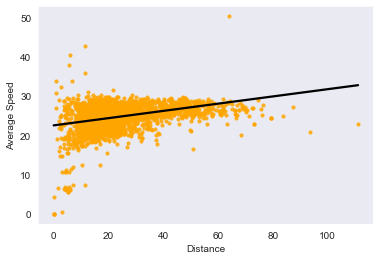

(2502, 7)


In [33]:
# MAHD poista
# muutetaan nopeus mutoon km/h (HUOM tämän syy tulee ilmi myöhemmin ko. puutteellisen datan johdosta)
#df2['Average Speed']=df2['Distance'] / (df2['Moving Time'] / 3600)

#print(df2['Average Speed'])

def regplot(df,columns):
    sns.set_style('dark')
    plt.figure()
    
    #plt.gcf().set_size_inches(17, 10)
    columns=columns
    sns.regplot(x = columns[0] , 
                    y = columns[1], 
                    data = df,scatter_kws={"color": "orange",'s':10}, line_kws={"color": "black"},ci=None)
    plt.show()
    
regplot(df2,['Distance','Average Speed'])
print(df2.shape)

In [34]:
tulosta=df2.loc[(df2['Average Speed']>35)]
display(tulosta)

tulosta=df2.loc[(df2['Distance']<5)]
display(tulosta[:5])
print(len(tulosta))

,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts,Calories
232,"30/11/2013 Alhaurín De La Torre, AL, Spain","Nov 30, 2013, 3:24:20 PM",1140.0,11.33,35.778947,282.740997,359.392090
629,"03/06/2015 Torremolinos, Andalucía, Spain","Jun 3, 2015, 11:53:55 AM",544.0,5.72,37.852941,457.566010,NaN
632,Ride,"Jun 4, 2015, 11:30:00 AM",535.0,6.00,40.373832,NaN,NaN
1929,Evening Ride,"May 25, 2012, 4:36:48 PM",971.0,11.55,42.821833,203.528549,220.353729
2057,Afternoon Ride,"Jun 26, 2014, 12:48:12 PM",4565.0,63.81,50.321139,609.448181,3102.075195


,Activity Name,Activity Date,Moving Time,Distance,Average Speed,Average Watts,Calories
52,"11/11/2013 Málaga, Andalucía, Spain","Nov 11, 2013, 1:14:10 PM",615.0,3.87,22.653659,287.355988,197.047195
66,"01/15/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 15, 2013, 10:57:29 AM",120.0,1.03,30.900000,237.153000,31.731071
67,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:01:50 AM",787.0,3.90,17.839898,229.059998,NaN
69,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:47:52 AM",470.0,2.10,16.085106,251.947006,132.032822
70,"01/22/2013 Tampere, Finland, Pirkanmaa, Finland","Jan 22, 2013, 10:30:15 AM",489.0,2.63,19.361963,272.729004,148.701401


64


Koska em. eivät ole normaaleja suorituksia, poistetaan datasetistä ja tarkistetaan tilanne uudestaan.
Visualisoidaan data uudestaan.

In [35]:
# poistetaan epäkurrantteja rivejä
df2=df2.loc[~(df2['Average Speed']>35)]
df2=df2.loc[~(df2['Distance']<5)]

# tarkistetaan, että em. toimenpiteet toteutuivat
tulosta=df2.loc[(df2['Average Speed']>35)]
print(tulosta)
tulosta=df2.loc[(df2['Distance']<5)]
print(tulosta)


Empty DataFrame
Columns: [Activity Name, Activity Date, Moving Time, Distance, Average Speed, Average Watts, Calories]
Index: []
Empty DataFrame
Columns: [Activity Name, Activity Date, Moving Time, Distance, Average Speed, Average Watts, Calories]
Index: []


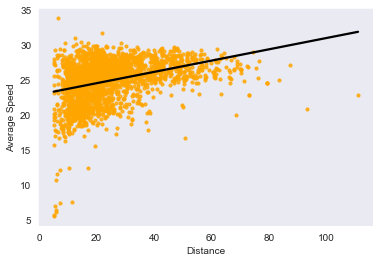

(2433, 7)

In [36]:
regplot(df2,['Distance','Average Speed'])
(df2.shape)

In [38]:
display(df2.isna().sum())

Activity Name      0
Activity Date      0
Moving Time        0
Distance           0
Average Speed      0
Average Watts     29
Calories         629
dtype: int64

## Tehtävä 4-2
### Aihe: Syväoppimisen toteutus (8 p)

1. Valitse sovellettava(t) syväoppimismalli(t) tehtävää varten
   1. Voit kokeilla esim. kahta eri tapaa
   2. Hyperparametrien kokeileminen parempien tuloksien saamiseksi on myös suotavaa
   3. Vertailun vuoksi toteutuksen voi tehdä myös jollakin soveltavalla koneoppimismallilla
2. Jaa aineisto koulutus- ja testausaineistoon
3. Toteuta syväoppiminen valitulla algoritmilla
   1. Se voi olla myös kurssin luentojen ulkopuolelta haettu ratkaisu
4. Laske luokittelutuloksen ennusteen tarkkuus ja sekaannusmatriisi 
   1. sekä mahdollisesti muita tunnuslukuja

#### OMA LUOKITUS kuulluisi oikeastaan ja osittain esikäsittelyyn
Kun itse arvion suorituksen taso ja onnistumista kiinnitän huomion keskinopeuteen suhteytettuna matkan pituuteen.
eli ihan peruskamaa, mutta nopeuteen vaikuttaa monet asiat mm. sääolosuhteet lämpötila tuuli reitin maasto, pyörä,
tienpinta asfaltti/hiekkatie/maasto
Korrrelaatiotaulukon perusteella 
Puuttuvien Calories-arvojen suhteellisen suuren määrän vuoksi ei luokitusta voida tehdä ko. joukolle dataa.
Joten jokin toinen mittari tai yhdistelmä luokituksen pohjaksi ja perusteeksi pitää valita ja sen pohjalta tehdä luokitus.
Average Watts seuraaksi tarkasteluun




Tsekkaa millä tiedoilla voidaan vielä saada hyvä Grade (luokitusmenetelmät) korrelaatiotaulukko voi paljastaa että 
kun jos ei ole korrelaatiota niin huono tulos tiedossa!!!!
Tehdään uusi sarake Grade, jioka kertoo kuinka hyvin suoritus sujui, käytössä on kouluarvosat 0-5 
LUoikituksen valinta, voisi ola joko Calories tai Avg.power kuinka korreloivat 
TEE verranto, lisää jokinnmuukinn esim. avg power sekää matkan pituus
Luokitus tehtiin nyt esimerkinomaisesti vain "Calories" suureen perusteella, eli paljonko kaloreita arvioidusti 
kulutettiin, tämän tiedon Strava-palvelu laskee johinkin arvoihin perustuen
TSekkaa miten se on laskettu, tsekkaa myös avg.powerin kaava ja kuinka em. 



Tsekkaa koneoppimismalleja artiikelissa esittyjä gitissä, onko siellä tehty oma luokitus ja onko poistettu ennusteessa

malli nykymuodossa jos uusi data syötetään sisältää siis tuon omatekemän luokittelun
k2_h4 harjoitus sähköhintaluokitus

satunnaismetsa.md

koneommisteht. 5 syöpätutkimus
http://localhost:8888/notebooks/koneoppiminen-tehtavat/tehtavat/aihe_3_bayes/tehtavat_aihe_3_bayes.ipynb
        

tunnusluvut

Onko omaan luokitukseen perustuva suure mukana ennustusta tehdessä, tapaukset on ja ei 
niin silloin kun ei niin tarkkuus putoaa luonnollisesti koska suurin/ainoa tekijä on Calories


Tämäkin korostaa sitä, että joissakin tapauksissa yksinkertaisemmat menetelmät voivat
olla paitsi tehokkaampia niin myös parempia vaihtoehtoja. Tämänkin seikan takia kannattaa aina kokeilla useampaa kuin
yhtä koneoppimismenetelmää aineiston kanssa ja vertailla niistä saatuja tuloksia toisiinsa.


In [40]:
#Average Watts seuraaksi tarkasteluun
display(df2['Average Watts'].isna().sum())


29

Hyvin vähän puutteellisia arvoja, joten seuraavaksi tsekataan korrellatiotaulukkoa

In [ ]:
# Huomataan, että 'Average Watts' korreloi hyvin 'Average Speed' kanssa ja selvästi parhaiten muista suureista.
# Calories (jolla on 2 selvää riippuvuutta muihin suureisiin) voisi muuten olla hyvä yksinään mutta kuten tuli 
# mainittua niin liian paljon on puuttuvaa dataa kun nyt kuitenkin 
# halutaan analysoida mahdollismman suuresti koko historiaa 10 vuoden ajalta

#stsekataan seuraavaksi "Average Speed" puuttuva data

,Moving Time,Distance,Average Speed,Average Watts
Moving Time,1.000000,0.974971,0.168723,0.064662
Distance,0.974971,1.000000,0.359912,0.220676
Average Speed,0.168723,0.359912,1.000000,0.847092
Average Watts,0.064662,0.220676,0.847092,1.000000


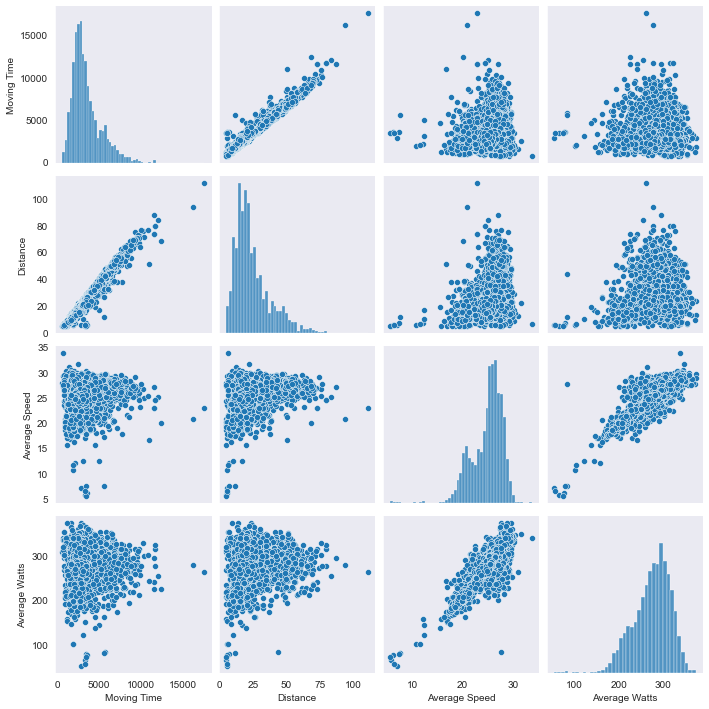

In [69]:
columns=['Moving Time','Distance','Average Speed','Average Watts']
display(df2[columns].corr())
#print(df2['Average Speed'].corr(df['Average Watts']))
sns.pairplot(df2[columns]);

#### Korrelaatio heatmap

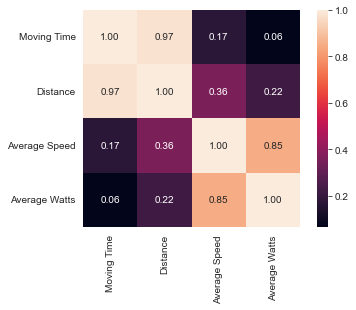

In [152]:
sns.heatmap(df2[columns].corr(), annot=True, fmt=".2f", square = True)
plt.show()

Koska 'Calories'-kentästä tuli hykiö niin poistetaan se. Lisäksi poistetaan aineistosta 'Average Watts'-kentän puuttuvan  arvon sisältämät rivit. 
Tehdään muutokset ja tarkistetaan datan eheys.

Nyt näyttää hyvältä.\
Muutetaan vielä aktiviteetin aikaleimaa sopivampaan/helpompaan muotoon\
ja lisätään muutama aikasarake valmiiksi niin on helpompi tehdä yhteenvetoja/analyysia aikajaksoihin liittyen.

In [52]:
print(df2.columns)
if 'Calories' in df2.columns:    
    df2.drop(['Calories'], axis=1,inplace=True)


#df=df2.copy()

avspeednan=df2['Average Watts'].isna().sum()
rowcnt=df2.shape[0]
print(f'{avspeednan} is {avspeednan/rowcnt*100} % of all the data')
rowsToDrop = df2.loc[(df2['Average Watts'].isnull())].index
df2.drop(rowsToDrop,inplace=True) 

display(df2.isna().sum())
df2.shape

Index(['Activity Name', 'Activity Date', 'Moving Time', 'Distance',
       'Average Speed', 'Average Watts'],
      dtype='object')
29 is 1.1919441019317716 % of all the data


Activity Name    0
Activity Date    0
Moving Time      0
Distance         0
Average Speed    0
Average Watts    0
dtype: int64

(2404, 6)

In [108]:
# muutetaan formaati toiseksi niin on helpompi käsitellä
df2['Activity DateTime']=pd.to_datetime(df2['Activity Date'])

# lisätään pari kenttää
df2['Year'] = df2['Activity DateTime'].dt.year
df2['Month'] = df2['Activity DateTime'].dt.month
df2['Week'] = df2['Activity DateTime'].dt.isocalendar().week 
df2['Dayofweek'] = df2['Activity DateTime'].dt.dayofweek
df2['Daynameofweek'] = df2['Activity DateTime'].dt.day_name()

print(df2[:1])

                                       Activity Name            Activity Date  \
0  07/08/2012 Kuopio, Finland, Kuopio, Finland, F...  Jul 8, 2012, 2:40:21 PM   

   Moving Time  Distance  Average Speed  Average Watts   Activity DateTime  \
0       5369.0     39.02      26.163531     303.006989 2012-07-08 14:40:21   

   Year  Month  Week  Dayofweek  Season Daynameofweek  
0  2012      7    27          6  Summer        Sunday  


### Aineiston analytiikkaa

In [ ]:
#### NYT df:ssä ei ole alkuperäistä data jos halutaan tietää jokun suorituksen selitys sekä ....
#### MUTTA voidaan tehdö df:ää hyödynten haku ehdoilla-111

In [153]:



###########################
#sns.heatmap(df2.corr(), annot=True, fmt=".2f", square = True)
#plt.show()
###########################

columns=['Moving Time','Distance','Average Speed','Average Watts']
display(df2[columns].describe())
# mikä on std, ehkä parempi kaikki mitä halutaanottaa erikseen
#display(df2['Distance'].mean())
#display(df2['Distance'].max())
###########################
#print("##################")


,Moving Time,Distance,Average Speed,Average Watts
count,2404.000000,2404.000000,2404.000000,2404.000000
mean,3543.536606,24.742517,24.872511,274.825229
std,1818.553108,13.545253,3.053123,42.288627
min,650.000000,5.020000,5.483304,52.061058
25%,2309.750000,15.320000,23.087130,249.701523
50%,3053.000000,21.020000,25.534660,280.815506
75%,4273.500000,30.335000,27.030117,305.075500
max,17522.000000,111.070000,33.798009,373.770325


Dataa voidaan kätevästi ja yksinkertaisesti esittää visualisesti, seuraavassa keskeiset muuttujien historgrammti sekä   

array([[<AxesSubplot:title={'center':'Moving Time'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Average Speed'}>,
        <AxesSubplot:title={'center':'Average Watts'}>]], dtype=object)

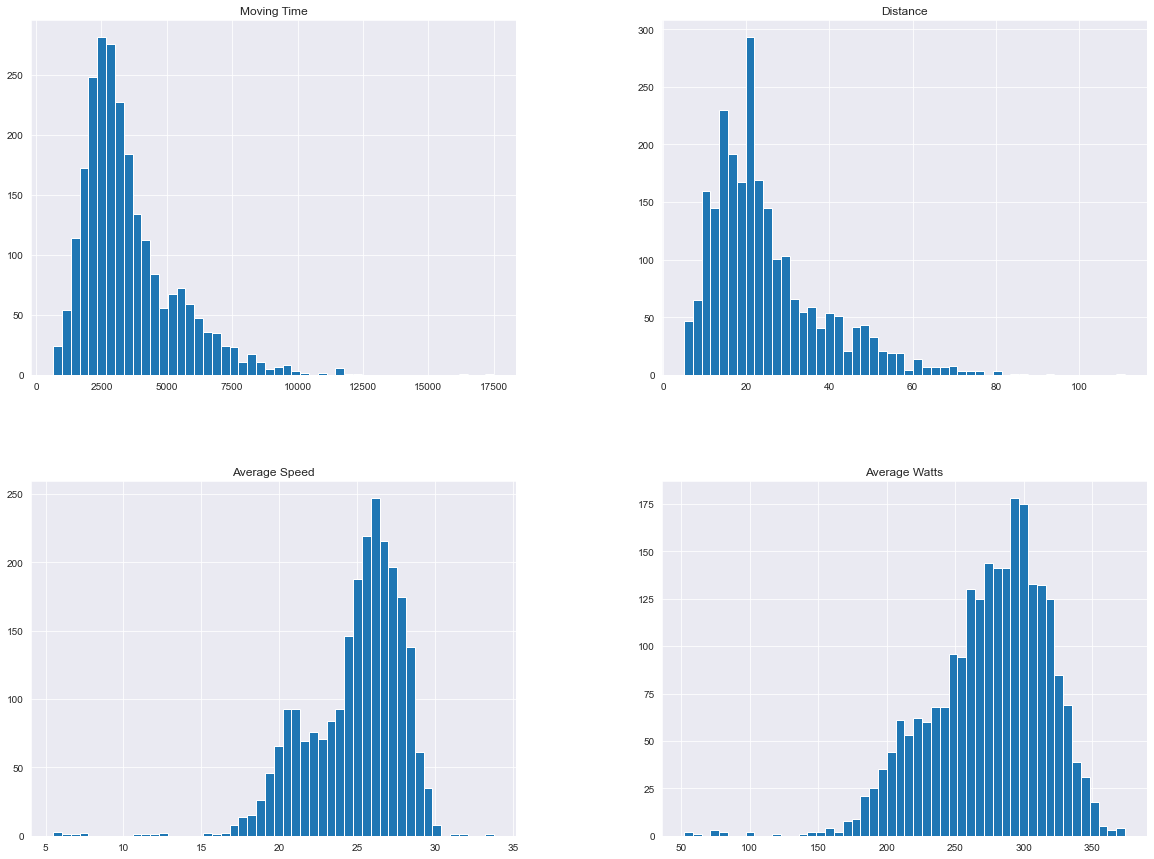

In [70]:
df2[columns].hist(bins=50,figsize=(20,15))
#sns.pairplot(df2[['Moving Time','Distance','Average Speed','Average Watts']]);

In [ ]:
regplot on kätevä, mutta kun halutaan saada dataa ulos niin erillin linearregression mooduuli johon voidaan tehdä ennustus ja nöhdä se graafissa

#### Kilometrien summa eri vuosina

,Year,Distance
0,2012,8585.14
1,2013,8622.17
2,2014,7755.46
3,2015,6538.73
4,2016,5127.68
5,2017,4652.30
6,2018,4822.22
7,2019,2700.23
8,2020,3948.74
9,2021,3327.84


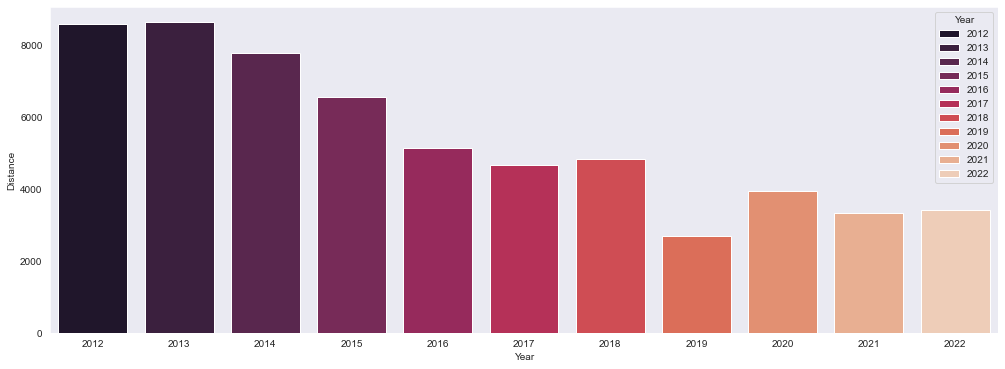

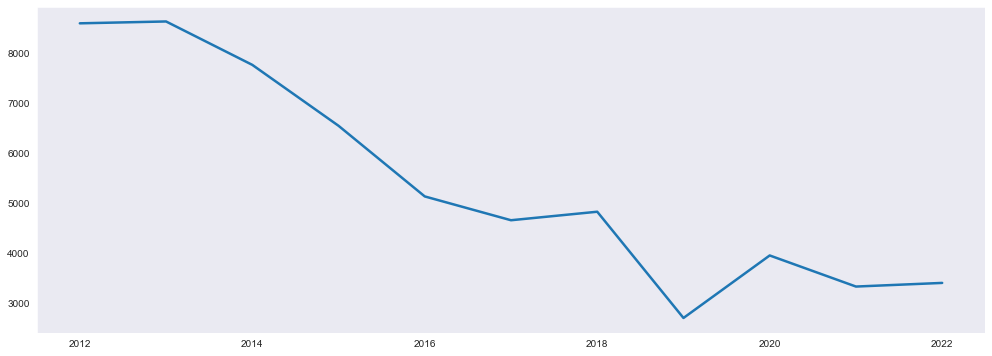

In [103]:
years=df2['Year'].unique()

distance=[]
for year in years:    
    x=df2.loc[df2['Year']==year]    
    distance.append(x['Distance'].sum())
    
distance=np.array(distance)

data={'Year':years,'Distance':distance}

data = pd.DataFrame(data)
display(data)

plt.figure()
sns.set_style('dark')
sns.barplot(x='Year', y='Distance', data=data, hue='Year', ci=None,palette = 'rocket',dodge=False)
plt.gcf().set_size_inches(17, 6)

plt.figure()
data = pd.DataFrame(distance,years)
sns.lineplot(data=data, palette="tab10", linewidth=2.5,legend=None)
plt.gcf().set_size_inches(17, 6)


#### Kilometrien summa eri kuukausina

,Month,Distance
0,January,3220.90
1,February,3288.37
2,March,4403.02
3,April,4102.59
4,May,5098.04
5,June,5956.85
6,July,5389.80
7,August,5715.92
8,September,4663.90
9,October,7558.64


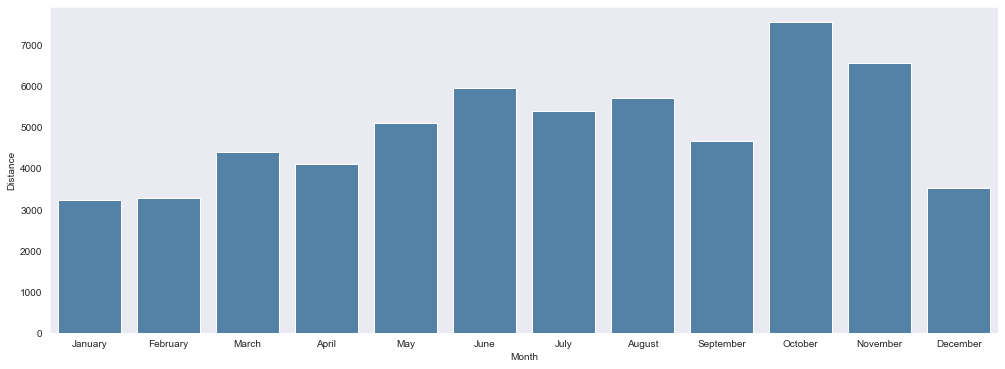

In [98]:
months=df2['Month'].unique()
months=np.sort(months)

monthNames = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

distance=[]
mNx=[]
for month in months:
    x=df2.loc[df2['Month']==month]    
    distance.append(x['Distance'].sum())    
    mNx.append(monthNames[month-1])
    
distance=np.array(distance)
data={'Month':mNx,'Distance':distance}
data = pd.DataFrame(data)
display(data)

plt.figure()
sns.barplot(data=data,x='Month', y='Distance', ci=None, color='steelblue',dodge=False)
plt.gcf().set_size_inches(17, 6)


#### Kilometrien summa eri viikonpäivinä

,Day,Distance
0,Monday,6927.58
1,Tuesday,8262.56
2,Wednesday,8773.86
3,Thursday,8440.00
4,Friday,9130.97
5,Saturday,9736.52
6,Sunday,8209.52


Max
        Day  Distance
5  Saturday   9736.52


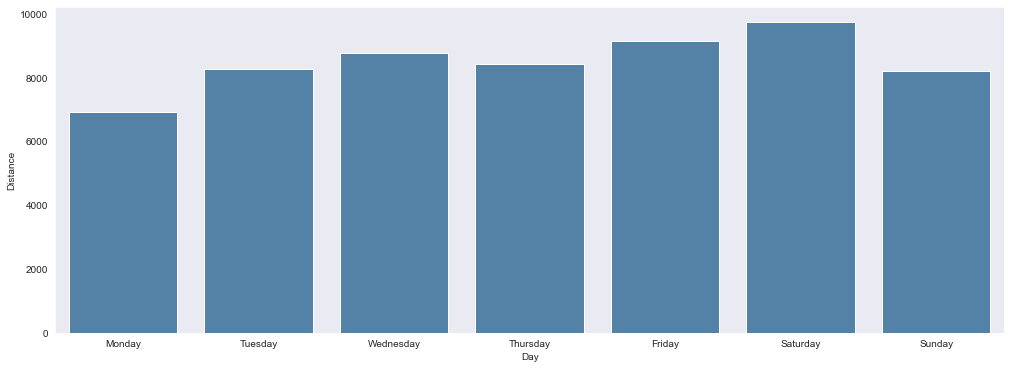

In [115]:

dayNames = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
dows=df2['Dayofweek'].unique()
dows=np.sort(dows)

distance=[]
dowNames=[]
for day in dows:    
    x=df2.loc[df2['Dayofweek']==day]    
    distance.append(x['Distance'].sum())
    dowNames.append(dayNames[day])
distance=np.array(distance)

data={'Day':dowNames,'Distance':distance}

data = pd.DataFrame(data) #,columns=['Day','Distance'])

display(data)

plt.figure()
sns.barplot(data=data, x='Day', y='Distance', ci=None, color = 'steelblue',dodge=False)
plt.gcf().set_size_inches(17, 6)

# miten saadaan maksimi viikonpäivän summa selville ja mikä ko. viikonpäivä on???
print("Max")
print(data.loc[data['Distance']==data['Distance'].max()])

#### Eniten kilometrejä vuodessa vuoden eri kuukausien kilometrien summa

,Month,Distance
0,January,337.58
1,February,315.38
2,March,352.74
3,April,175.27
4,May,517.64
5,June,917.85
6,July,582.92
7,August,818.78
8,September,663.74
9,October,1522.25


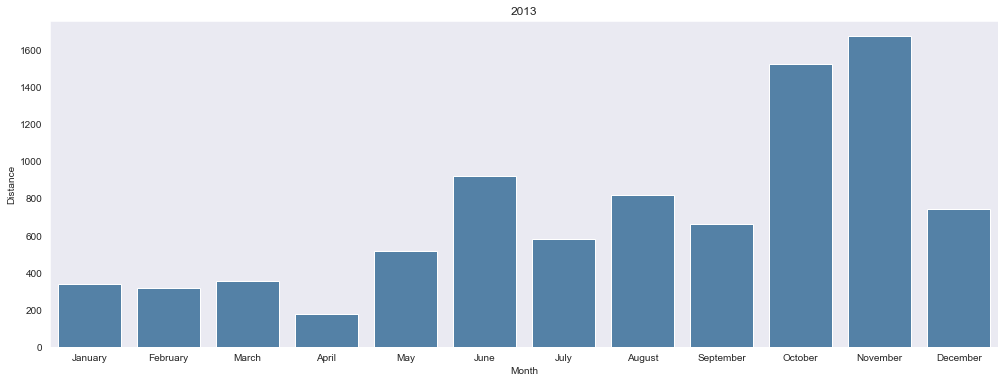

In [134]:
years=df2['Year'].unique()

distance=[]
for year in years:    
    x=df2.loc[df2['Year']==year]    
    distance.append(x['Distance'].sum())
    
distance=np.array(distance)
sortedindex = np.argsort(distance, axis=0)
maxind=sortedindex[::-1][0]

maxYear=years[maxind]

### maksimivuoden tiedot
data=df2.loc[df2['Year']==maxYear]    

distance=[]
mN=[]
for month in months:
    x=data.loc[data['Month']==month]    
    distance.append(x['Distance'].sum())    
    mN.append(monthNames[month-1])
    
distance=np.array(distance)

data={'Month':mN,'Distance':distance}
data = pd.DataFrame(data)
display(data)

plt.figure()
sns.set_style('dark')
sns.barplot(data=data,x='Month', y='Distance', ci=None, color='steelblue',dodge=False).set(title=f'{maxYear}')
plt.gcf().set_size_inches(17, 6)

#### Kilometrien summa eri vuosien eri kuukausina

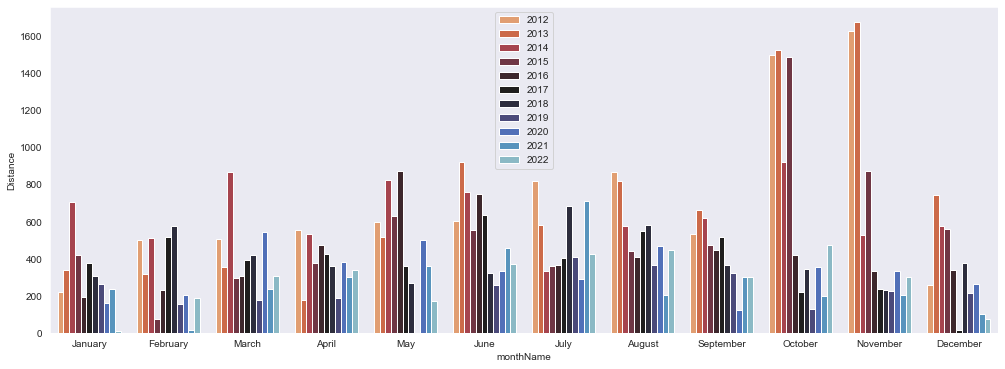

In [143]:
df2['monthName'] = df2['Activity DateTime'].dt.month_name()

plt.figure()
sns.set_style('dark')
sns.barplot(x='monthName', y='Distance', data=df2, hue='Year', ci=None, estimator=np.sum, palette = 'icefire_r',dodge=True,order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]) #.set(title=f'{}')
plt.legend(loc='upper center')
plt.gcf().set_size_inches(17, 6)

Graafista katsoen marraskuussa vuosina 2012-2013 on eniten kilometrejä kertnyt mittariin, myös em. vuosina \
lokakuu on myös ollut hyvä kuukausi, tämä selittyy sillä että olen käynyt Malagassa
pyöräilemässä 2011-2015. 


,Season,Distance
0,Spring,13603.65
1,Summer,17062.57
2,Autumn,18788.20
3,Winter,10026.59


Max
   Season  Distance
2  Autumn   18788.2


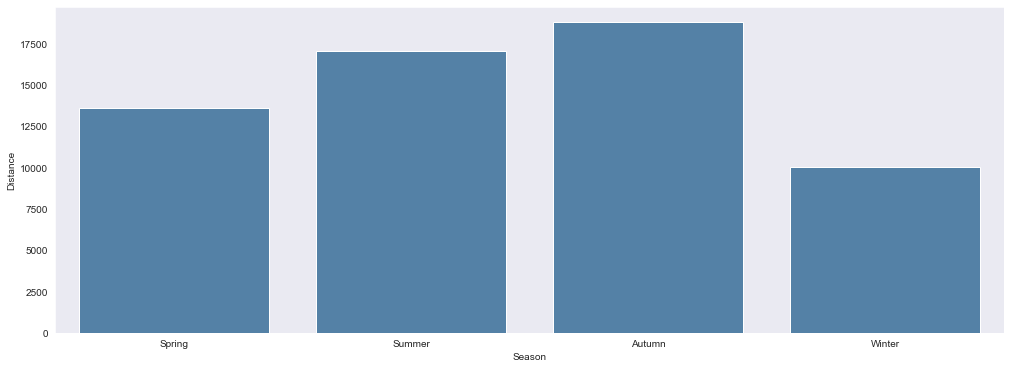

In [147]:
distance=[]
for i in range(len(seasons)):
    dfx=df2.loc[df2["Season"]==seasons[i]]
    distance.append(dfx['Distance'].sum())

sns.set_style('dark')
plt.figure()
data={'Season':seasons,'Distance':distance}
data = pd.DataFrame(data)
display(data)

sns.barplot(x='Season', y='Distance', data=data, ci=None, color='steelblue',dodge=False)
plt.gcf().set_size_inches(17, 6)

print("Max")
print(data.loc[data['Distance']==data['Distance'].max()])

### Lineaarinen regressio

In [ ]:

Moni voisi ajatella keskinopeuden laskevan matkan kasvaessa tietyn rajan yli, mutta aineisto on 10 vuoden ajalta
niin muutosta on tapahtunut siten, että pidempiä matkoja ei tule enää harrastettua ja tottuus on se, että ajan hyvin 
tasaisesti matkan kuin matkan ja tsemppaan loppua kohden. Joten käyrä pitää paikkaansa koko aniston osalta mutta
voidaan tehdä koe vaikka viime vuodesta niin tilanne onkin varmaan toinen.
Yleisesti ottaen luulisi vauhdin/nopeuden hyytyvän kun matka pitenee, mutta tähän on selitys matkojen pituus
on pysynyt tietyssä rangessa jolloin on voinut määrätietoisen tehokkaasti tehdä suoritukset. 
Oman kokemukseni mukaan tulos ei ollut yllätys sillä usein kiristän vauhtia loppua kohden. 
Keskinopeus on melko pienllä vaihtelulalueella koko aineot huomioiden. 
Kun tekee ennustuksen pitäisi ohjelman hakea päivämäärän perusteella season ja sen perusteella 
ennuste tehdään ko. vuodenajan aineiston suhteen.

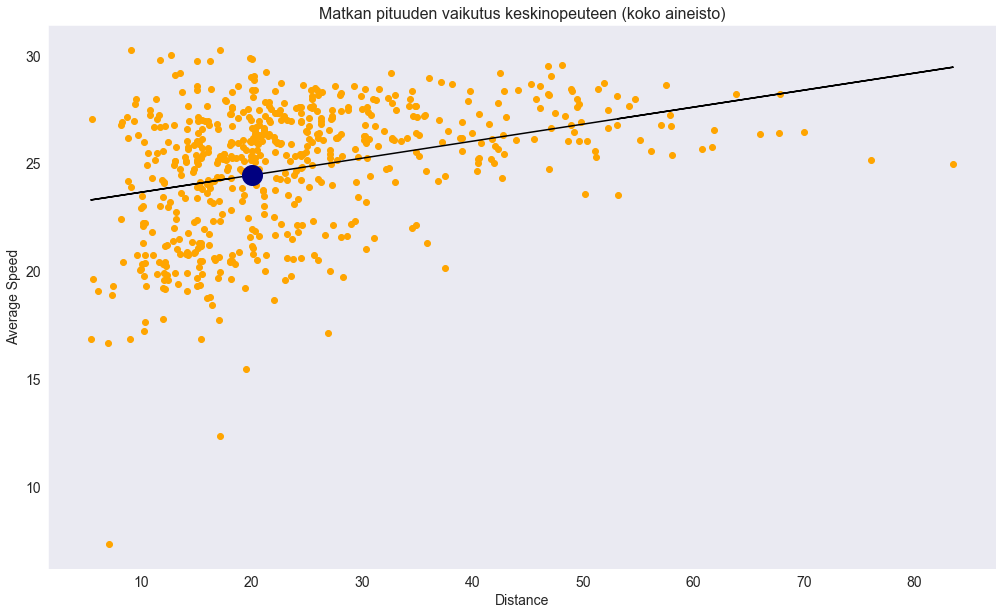

Matka 20 km, arvioitu keskinopeus on 24.47 km/h


In [85]:

from sklearn.linear_model import LinearRegression
def linearRegression(df,columns,value,text):

    X = np.array(df[columns[0]]).reshape(-1, 1)
    y = np.array(df[columns[1]]).reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    model = LinearRegression()

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    sns.set_style('dark')
    plt.figure()
    plt.gcf().set_size_inches(17, 10)
    plt.scatter(X_test, y_test, color ='orange')
    plt.plot(X_test, y_pred, color ='k')
    
    x_pre = [[value]]    
    y_pre = model.predict(x_pre)
    
    plt.plot(x_pre,y_pre, marker='o', c="navy", ms=20,ls='none')

    plt.xlabel(columns[0], size=14)
    plt.ylabel(columns[1], size=14)
    plt.title(f"{text}",size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.show()
    return y_pre

columns=['Distance','Average Speed']
value=20
text="Matkan pituuden vaikutus keskinopeuteen (koko aineisto)"
result=linearRegression(df2,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h')

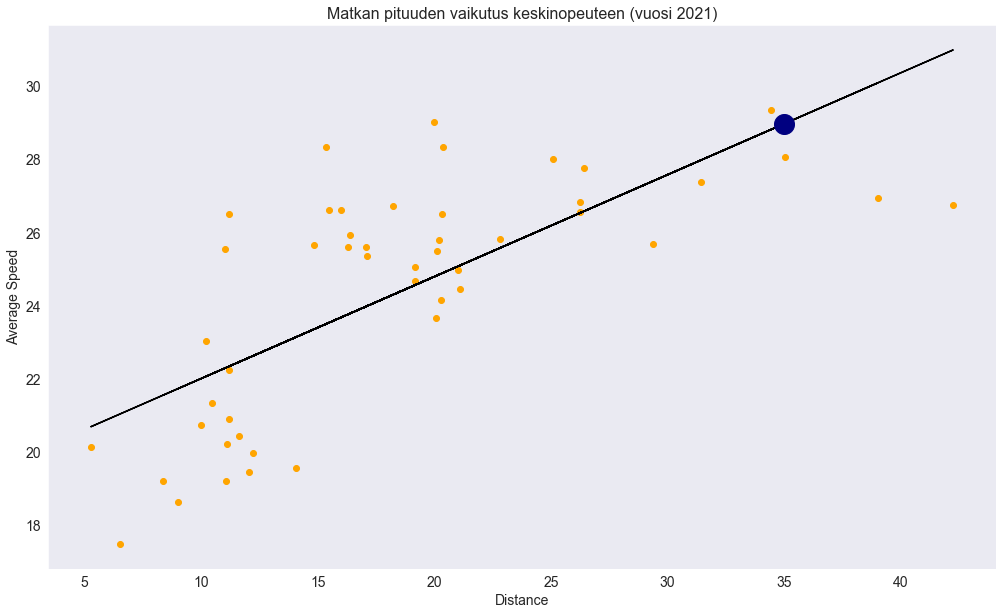

Matka 35 km, arvioitu keskinopeus on 28.99 km/h


In [86]:
data=df2.loc[(df2['Year']==2021)]
#x=df.loc[df['Month']==month] 
value=35
text="Matkan pituuden vaikutus keskinopeuteen (vuosi 2021)"
result=linearRegression(data,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h')

Tuli todistettua, että nopeus on säilynyt matkojen lyhentyessä. \
Mutta mites talviaikana?

(536, 12)

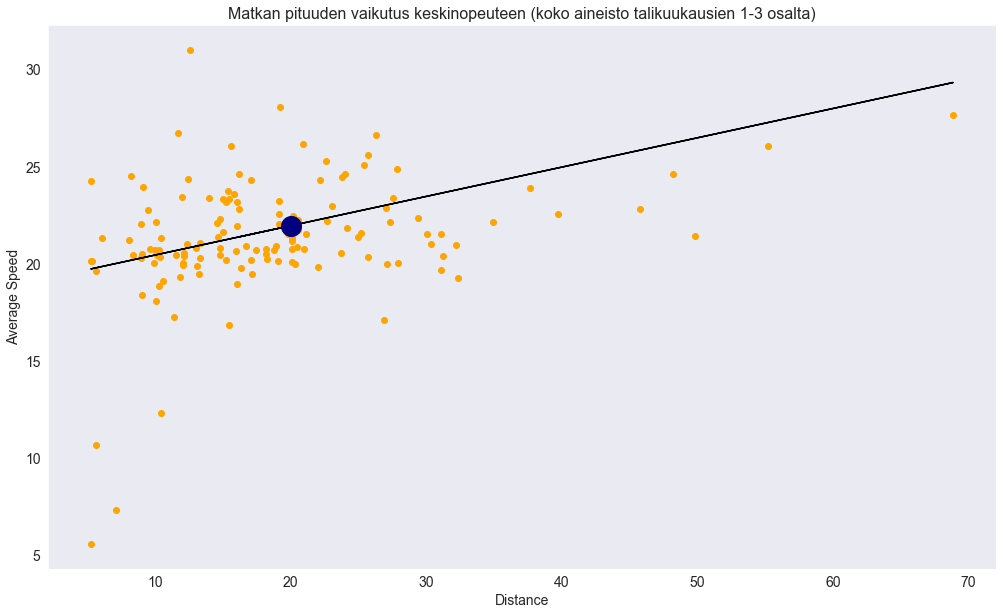

Matka 20 km, arvioitu keskinopeus on 21.98 km/h 


In [90]:
# lisätään dataframeen season-sarake, joka täytetään ko. datalla
# kevät kuukaudet 3-5, kesä 6-8, syksy 9-11, talvi 12,1,2

seasons=['Spring','Summer','Autumn','Winter']

df2.loc[(df2["Month"]>=3) & (df2["Month"]<=5), 'Season'] = seasons[0]
df2.loc[(df2["Month"]>=6) & (df2["Month"]<=8), 'Season'] = seasons[1]
df2.loc[(df2["Month"]>=9) & (df2["Month"]<=11), 'Season'] = seasons[2]
df2.loc[(df2["Month"]==1) | (df2["Month"]==2) | (df2["Month"]==12), 'Season'] = seasons[3]

def getSeason(month):
    seasons=['Spring','Summer','Autumn','Winter']
    
    if (month>=3) & (month>=5):
        return seasons[0]
    elif (month>=6) & (month>=8):
        return seasons[1]
    elif (month>=9) & (month>=11):
        return seasons[2]    
    elif (month==12) | (month==1) | (month==2):        
        return seasons[3]
   
season=getSeason(1)

dfForSeason=df2.loc[df2['Season']==season]
display(dfForSeason.shape)

columns=['Distance','Average Speed']
value=20
text=text="Matkan pituuden vaikutus keskinopeuteen (koko aineisto talikuukausien 11,1,2 osalta)"
result=linearRegression(dfForSeason,columns,value,text)
print(f'Matka {value} km, arvioitu keskinopeus on {round(result[0][0],2)} km/h ')


Edelleenkään nopeus ei laske matkan pituuden kasvaessa. Tähänkin on yksi osa selitys, että aineistossa on myös Espanjassa \ 
tehtyjä aktiviteetteja joinakin vuosina joulukuussa ja matkat ovat talvisin lyhyempi niin suoritustaso pysyy vakaana.

#### Luokitus

Tehdään luokitus perustuen em. seikkoihin, tällöin luokitellaan sarakkeiden "Average Watts" ja "Average Speed" mukaan niin että luokitus on näiden kahden sarakkeen luokitusten keskiarvo pyöristettynä ylöspäin seuraavaan kokonaislukuun.

In [213]:
def getClassifyLimits(column):
    mean=df2[column].mean()
    print(f'mean= {mean}')
    min=df2[column].min()
    print(f'min= {min}')
    max=df2[column].max()
    print(f'max= {max}')

    lims = np.linspace(min, max, 7, endpoint = True).round(3)

    mins=[]
    maxs=[]
    grades=[]
    max=5
    for i in range(max):            
        mins.append(lims[i])
        maxs.append(lims[i+1])
        grades.append(i)
    mins.append(lims[max])
    maxs.append('')
    grades.append(max)

    data={'>=':mins,'<':maxs, 'Grade':grades}
    data = pd.DataFrame(data)
    return data

def doClassify(column,newColumn):
    
    data=getClassifyLimits(column)
    display(data)

    for i in range(max):            
        df2.loc[(df2[column] >= data.iloc[i][0]) & (df2[column] < data.iloc[i][1]), newColumn] = i
    df2.loc[(df2[column] >= data.iloc[max][0]), newColumn] = max

doClassify('Average Speed','GradeSpeed') 
doClassify('Average Watts','GradeWatts')    

# pyöristetään ylöspäin
df2['Grade']=(df2['GradeSpeed']+df2['GradeWatts'])/2+((df2['GradeSpeed']+df2['GradeWatts'])%2)/2

## dropataan apukentät
df2.drop(['GradeWatts','GradeSpeed'], axis=1,inplace=True)
#columns=['GradeSpeed','GradeWatts','Grade']
columns=['Grade']
#print(df2[columns][:100])

print("Value counts")
display(df2['Grade'].value_counts())



mean= 24.872510986513845
min= 5.483304042179262
max= 33.79800853485064


,>=,<,Grade
0,5.483,10.202,0
1,10.202,14.922,1
2,14.922,19.641,2
3,19.641,24.36,3
4,24.360,29.079,4
5,29.079,,5


mean= 274.825229343281
min= 52.0610580444336
max= 373.7703247070313


,>=,<,Grade
0,52.061,105.679,0
1,105.679,159.297,1
2,159.297,212.916,2
3,212.916,266.534,3
4,266.534,320.152,4
5,320.152,,5


Value counts


4.0    1410
3.0     586
5.0     302
2.0      94
0.0       7
1.0       5
Name: Grade, dtype: int64

In [187]:
mean=df2['Average Watts'].mean()
print(f'mean= {mean}')
min=df2['Average Watts'].min()
print(f'min= {min}')
max=df2['Average Watts'].max()
print(f'max= {max}')

lims = np.linspace(min, max, 7, endpoint = True).round(3)

#df.insert(len(df.columns),'hintaluokka',"",True)

mins=[]
maxs=[]
grades=[]
max=5
for i in range(max):            
    mins.append(lims[i])
    maxs.append(lims[i+1])
    grades.append(i)
    #df2.loc[(df2['Average Watts'] >= lims[i]) & (df2['Average Watts'] < lims[i+1]), 'Grade'] = i
#df2.loc[(df2['Average Watts'] >= lims[max]), 'Grade'] = max
mins.append(lims[max])
maxs.append('')
grades.append(max)

data={'>=':mins,'<':maxs, 'Grade':grades}
data = pd.DataFrame(data)
display(data)

#print(data.iloc[0][0])
#print(data.iloc[0][1])

for i in range(max):            
    df2.loc[(df2['Average Watts'] >= data.iloc[i][0]) & (df2['Average Watts'] < data.iloc[i][1]), 'Grade'] = i
df2.loc[(df2['Average Watts'] >= data.iloc[max][0]), 'Grade'] = max
print(df2[:1])

mean= 274.825229343281
min= 52.0610580444336
max= 373.7703247070313


,>=,<,Grade
0,52.061,105.679,0
1,105.679,159.297,1
2,159.297,212.916,2
3,212.916,266.534,3
4,266.534,320.152,4
5,320.152,,5


                                       Activity Name            Activity Date  \
0  07/08/2012 Kuopio, Finland, Kuopio, Finland, F...  Jul 8, 2012, 2:40:21 PM   

   Moving Time  Distance  Average Speed  Average Watts   Activity DateTime  \
0       5369.0     39.02      26.163531     303.006989 2012-07-08 14:40:21   

   Year  Month  Week  Dayofweek  Season Daynameofweek monthName  Grade  
0  2012      7    27          6  Summer        Sunday      July    4.0  


In [180]:
mean=df2['Average Speed'].mean()
print(f'mean= {mean}')
min=df2['Average Speed'].min()
print(f'min= {min}')
max=df2['Average Speed'].max()
print(f'max= {max}')

lims = np.linspace(min, max, 7, endpoint = True).round(3)

mins=[]
maxs=[]
grades=[]
max=5
for i in range(max):            
    mins.append(lims[i])
    maxs.append(lims[i+1])
    grades.append(i)
    #df2.loc[(df2['Average Speed'] >= lims[i]) & (df2['Average Speed'] < lims[i+1]), 'Grade'] = i
#df2.loc[(df2['Average Speed'] >= lims[max]), 'Grade'] = max
mins.append(lims[max])
maxs.append('')
grades.append(max)

data={'>=':mins,'<':maxs, 'Grade':grades}
data = pd.DataFrame(data)
display(data)

mean= 24.872510986513845
min= 5.483304042179262
max= 33.79800853485064


,>=,<,Grade
0,5.483,10.202,0
1,10.202,14.922,1
2,14.922,19.641,2
3,19.641,24.36,3
4,24.360,29.079,4
5,29.079,,5


In [ ]:
#Oma luokitus: otetaanko season huomioon
#km/h Distance avgHR  'Calories','Activity Name','Average Watts'
## kokeeksi tehty karkea jako Calories arvojen perusteella
## vois tosin tehdä yhdistelmän monen suureen ja niiden välisten vaikutusten suhteen mutta tämä näin
## ajatuksen tasolla
### kouluarvosanoilla 0-5

### ei ole sama millä metodilla tehdään luokitust ja ennustuksia
### verrataan mikä on paras luokitusmetodi ko. datalle

def dropNanRowByColumn(df,column):

    rowsToDrop = df.loc[(df[column].isnull())].index
    df.drop(rowsToDrop,inplace=True) 


#dropNanRowByColumn(df2,"Calories")    
    
    
#print(df2.columns)
#df2['Calories'].max()


#print(df2['Calories'].min())


#calories=df2.loc[(df2['Calories']>mean+2500)]

#print(calories[:2])
#print(len(calories))

# tämä tulee alkuun elilisättän uusi kenttä luokalle

# luokitus voisi olla monimutkaisempi, jolloin keskinöiset riippuvuus suhtee tilanteesta riippuen tulisi 
# huomioiuksi mutta

def doClassification(df):
    
    mean=df['Calories'].mean()
        
    df.loc[(df['Calories']>mean+2500),'Grade'] = 5
    
    df.loc[(df['Calories']<=mean+2500) & (df2['Calories']>mean+1000),'Grade'] = 4
    
    df.loc[(df['Calories']<=mean+1000) & (df2['Calories']>mean),'Grade'] = 3
    
    df.loc[(df['Calories']<=mean) & (df2['Calories']>mean-300),'Grade'] = 2
    
    df.loc[(df['Calories']<=mean-300) & (df2['Calories']>mean-600),'Grade'] = 1

    df.loc[(df['Calories']<mean-600),'Grade'] = 0
    
doClassification(df2)

## tsekkaa korrelaatio avg power calories!!!!


#df2=df[['km/h','Activity ID','Activity Date','Moving Time','Distance']] #,'Average Speed']] ##,'Average Watts','Calories']] #'Max Watts','Relative Effort']]

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score


df3=df2[['km/h','Moving Time','Distance','Average Watts','Calories','Grade']]

# miten saadaan laskettua kuinka paljonmitäkin arvoa?
print(df3['Grade'].value_counts())





#df3=df2[['Calories','Grade']]

df3.dropna() #inplace=True)

#print(df3.columns)    
#X=df.drop(['actual_productivity','class'], axis=1)

### HUOM poistettu myös luokitteluun 0-5 perustunut kenttä Calories, tällöin vissiin tapahtuu oppimista
### eli 
### tee verranto onko "Calories" mukana vai ei
### Voidaan myös kokeilla että jätetään aineistosta pois vaikka viimeinen ja tehdään sillä 
### ennustus (onhan sekin luokiteltu) niin voidaan verrata
### ennustettavuus paranee jos season on huomioitu???
X = df3.drop(['Grade','Calories'], axis=1)
#X=X.drop('Calories', axis=1)
#print(X)
y = df3['Grade']

#print(df3)

#df3=df2
#columnsToDrop = ['Grade','Season','Activity DateTime'], #,'Activity Date']

#for col in columnsToDrop:
#    df3.drop(col, axis=1, inplace=True)
#X=df3

#print(X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


from sklearn.naive_bayes import GaussianNB
def gnb(X_train, y_train,X_test,p):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    if p==0:    
        return gnb.predict(X_test)
    else:
        return gnb

y_pred=gnb(X_train, y_train,X_test,0)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Naive/GaussianNB")
print(acc)
print(cm)
print()

from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train,X_test,p):
    knn = KNeighborsClassifier(n_neighbors=4) # HUOM parametri
    knn.fit(X_train, y_train)
    if p==0:
        return knn.predict(X_test)
    else:
        return knn

y_pred=knn(X_train, y_train,X_test,0)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("KNeighborsClassifier")
print(acc)
print(cm)
print()

from sklearn.svm import LinearSVC
def svm(X_train, y_train,X_test,p):
    svm = LinearSVC(max_iter=1000)
    svm.fit(X_train, y_train)
    if p==0:
        return svm.predict(X_test)
    else:
        return svm

y_pred=svm(X_train, y_train,X_test,0);

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("LinearSVC")
print(acc)
print(cm)
print()

from sklearn.ensemble import RandomForestClassifier
def rfc(X_train, y_train,X_test,p):
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    if p==0:
        return rfc.predict(X_test)
    else:
        return rfc

y_pred=rfc(X_train, y_train,X_test,0)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("RandomForestClassifier")
print(acc)
print(cm)
print()

from sklearn.tree import DecisionTreeClassifier
def dtc(X_train, y_train,X_test,p):
    dtc = DecisionTreeClassifier()    
    dtc.fit(X_train, y_train) 
    if p==0:
        return dtc.predict(X_test)
    else:
        return dtc

y_pred=dtc(X_train, y_train,X_test,0)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('DecisionTreeClassifier')
print(acc)
print(cm)
print()

def test(luokka,item):    
    item=ss.transform(item)
    print()
    y_pred=dtc(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'DecisionTreeClassifier -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'DecisionTreeClassifier -> ennustettu: {y_pred}')
    y_pred=svm(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'LinearSVC -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'LinearSVC -> ennustettu: {y_pred}')
    
    y_pred=knn(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'knn -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'knn -> ennustettu: {y_pred}')
        
    y_pred=gnb(X_train, y_train,item,0)[0]
    
    if luokka!="":
        print(f'GaussianNB -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'GaussianNB -> ennustettu: {y_pred}')
        
    y_pred=rfc(X_train, y_train,item,0)[0]
    if luokka!="":
        print(f'RandomForestClassifier -> luokka: {luokka} ennustettu: {y_pred}')
    else:
        print(f'RandomForestClassifier -> ennustettu: {y_pred}')

#item=df.loc[[2]]
#item=df3.loc[[100]]
#item=df.loc[[135]]
#X = df3.drop(['Grade','Calories'], axis=1)
item=df3.loc[756:756]
print(item)
#item=item.drop(['Calories'], axis=1)
#item['Distance']=20
#print(item)
#luokka=item['Grade'].values[0]
#item.drop(['Grade'], axis=1,inplace=True)   
#test(luokka,item)    




luokka=item['Grade'].values[0]
item.drop(['Grade','Calories'], axis=1,inplace=True)   
print(item)
test(luokka,item)

# Muokataan hieman dataa ja katsotaan tulos
#    km/h  Moving Time  Distance  Average Watts
# 22.819998      17522.0    111.07     262.348999

item['Distance']=55
item['km/h']=55/(7522/3600)
# Average Watts teho pidetään samana 
test("",item)


item['Distance']=55
item['km/h']=55/(12522/3600)
item['Average Watts']=100
test("",item)



### 
# voisiko tehdä yhteenvedon montako kutakin arvosanaa on aineistossa!!!!


## Tehtävä 4-3
### Aihe: Tulosten analysointi (4 p)

1. Analysoi ja vertaile malleilla saamiasi oppimistuloksia
2. Kuinka syväoppiminen eri menetelmillä sujui valitun aineiston ja valittujen menetelmien kohdalla
3. Kuinka hyvin menetelmä toimi?
4. Mitä kehitettävää syväoppimismallissa tai esikäsittelyvaiheessa havaitset? 
   1. dokumentoi mahdolliset kehityskohteet
5. Kuinka voisit optimoida syväoppimismallia?
6. Muita huomioita tehtävästä?

In [ ]:
Lue engalnninkieliset artikkelit niistä alkuun ja tänne analysointi mileipiteitä

Tässä raportissa on keskitytty enimmäkseen treenin pituuteen koska se on hyvin oleellinen suure.